### **I. DATA PRE-PROCESSING PIPELINE**

### **1. Data quality assessment**

### Data tools and file handling

In [465]:
# Importing python data analysis tools and a library to access & load relevant data set
# Choosing plot style as well 
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [466]:
# Accessing the raw data set of house listings from a csv file web scraped from immoweb.be
# and passing it into a pandas dataframe
# Printing all the field names of all the columns in the data.
with open('/Users/anix/GNT-Arai-3/content/00.projects/2ndindproj/assets/houses.csv', 'r') as csvfile:
    df = pd.read_csv(csvfile, index_col=[0])
print(df.columns.values) 

['Location' 'Property type' 'Property subtype' 'Price' 'Type of sale'
 'Number of bedrooms' 'Living area' 'Kitchen' 'Furnished' 'Open fireplace'
 'Terrace' 'Terrace orientation' 'Garden' 'Garden orientation'
 'Surface area land' 'Number of facades' 'Pool' 'Condition']


In [467]:
# Getting a glimpse of the raw data set through a pandas data frame
df.head()

,Location,Property type,Property subtype,Price,Type of sale,Number of bedrooms,Living area,Kitchen,Furnished,Open fireplace,Terrace,Terrace orientation,Garden,Garden orientation,Surface area land,Number of facades,Pool,Condition
0,Verviers,HOUSE,HOUSE,296607.0,residential_sale,3.0,130.0,Unknown,False,False,True,Unknown,True,Unknown,239.0,3,NaN,AS_NEW
1,Haasdonk,HOUSE,HOUSE,560000.0,residential_sale,4.0,NaN,Unknown,NaN,False,Unknown,Unknown,Unknown,Unknown,626.0,3,NaN,AS_NEW
2,VIANE,HOUSE,HOUSE,299000.0,residential_sale,5.0,200.0,SEMI_EQUIPPED,False,False,Unknown,Unknown,Unknown,Unknown,1150.0,NaN,NaN,GOOD
3,Gerpinnes,HOUSE,HOUSE,300000.0,residential_sale,0.0,270.0,Unknown,False,False,True,SOUTH,True,SOUTH,498.0,3,False,NaN
4,Nivelles,HOUSE,HOUSE,195000.0,residential_sale,3.0,135.0,INSTALLED,False,False,True,Unknown,Unknown,Unknown,165.0,2,False,NaN


In [468]:
# Determining the number of rows and columns
df.shape

(10082, 18)

### Exploratory Data Analysis (EDA)

### Numerical EDA

For this project, we'll **focus on numerical variables** which will be **considered as features** in a machine
learning model that will be built & trained, and deployed in a web application down the last pipeline. 

In [469]:
# Determining the data types 
# and focusing our attention on the numerical types:
# 'Price', 'Number of bedrooms', 'Living area',and 'Surface area land';
# 'Property type' shall be considered as the index
df.dtypes

Location                object
Property type           object
Property subtype        object
Price                  float64
Type of sale            object
Number of bedrooms     float64
Living area            float64
Kitchen                 object
Furnished               object
Open fireplace            bool
Terrace                 object
Terrace orientation     object
Garden                  object
Garden orientation      object
Surface area land      float64
Number of facades       object
Pool                    object
Condition               object
dtype: object

In [470]:
# Dropping the columns APART FROM 'Property type'; Number of bedrooms', 'Living area', 
# and 'Surface area land' i.e. to be treated as features; and 'Price' to be treated as the label. 
cols = ['Location', 'Property subtype','Type of sale', 'Kitchen', 'Furnished', 'Open fireplace',
 'Terrace', 'Terrace orientation', 'Garden', 'Garden orientation',
 'Number of facades', 'Pool', 'Condition']
new_df = df.drop(cols, axis=1)
print(new_df.columns.values) 

['Property type' 'Price' 'Number of bedrooms' 'Living area'
 'Surface area land']


In [471]:
# Determining the number of rows and columns in the data frame
# The rows are the number of observations in the data frame
new_df.shape

(10082, 5)

In [472]:
# Getting a glimpse of the first few rows of the new data frame
# We can already see that there are problemmatic/unsatisfactory data fields that cannot be processed as 
# numerical attributes (e.g. NaN in 'Living area' understood as a measurement) which we shall take into account
# in step 2. Data Cleaning 
new_df.head()

,Property type,Price,Number of bedrooms,Living area,Surface area land
0,HOUSE,296607.0,3.0,130.0,239.0
1,HOUSE,560000.0,4.0,NaN,626.0
2,HOUSE,299000.0,5.0,200.0,1150.0
3,HOUSE,300000.0,0.0,270.0,498.0
4,HOUSE,195000.0,3.0,135.0,165.0


In [473]:
# Making sure again that the columns of the new data frame (that will be treated as features in the upcoming
# machine learning model) indeed contain numerical variables 
new_df.dtypes

Property type          object
Price                 float64
Number of bedrooms    float64
Living area           float64
Surface area land     float64
dtype: object

In [474]:
# Getting statistical information on the new data frame
# This information will prove useful when we start exploring the data frame through visuals
new_df.describe()

,Price,Number of bedrooms,Living area,Surface area land
count,9.958000e+03,9970.000000,7750.000000,9970.000000
mean,4.027817e+05,3.500802,212.910065,910.493781
std,4.955725e+05,3.784634,174.816390,5780.217055
min,2.500000e+03,0.000000,7.000000,0.000000
25%,2.250000e+05,3.000000,137.000000,126.000000
50%,3.200000e+05,3.000000,175.000000,324.000000
75%,4.485668e+05,4.000000,237.750000,755.000000
max,3.500000e+07,333.000000,6200.000000,424913.000000


**A. LOCATING NaN VALUES**
We prefer that there are no NaN values in the data fields of the numerical attributes 'Price,' 'Number of bedrooms',
'Living area' and 'Surface area land.' To find out if there indeed are, we have to sort the values passing the 
using the pandas .sort_values() method and passing esp. the positional argument 'na_position="first"' to locate
NaN values.

In [475]:
# Simply sorting the data frame according to the column 'Price' and the positional agrument 'na_position=first' 
# (among others) to capture NaN values, we are given information of the data fields that necessitate 
# 2. Data cleaning
new_df.sort_values(by='Price', ascending=False, na_position='first')

,Property type,Price,Number of bedrooms,Living area,Surface area land
342,HOUSE_GROUP,NaN,NaN,NaN,NaN
343,HOUSE_GROUP,NaN,NaN,NaN,NaN
378,HOUSE_GROUP,NaN,NaN,NaN,NaN
379,HOUSE_GROUP,NaN,NaN,NaN,NaN
380,HOUSE_GROUP,NaN,NaN,NaN,NaN
...,...,...,...,...,...
233,HOUSE,14900.0,2.0,32.0,200.0
8635,HOUSE,10000.0,2.0,NaN,398.0
7753,HOUSE,2500.0,5.0,1617.0,3738.0
6468,HOUSE,2500.0,0.0,NaN,452.0


Based on simply sorting the data frame according to locate NaN values, we now have good reason to eliminate problemmatic/undersired data fields under all of the numerical attributes (‘Price’, ‘Number of bedrooms’, ‘Living area’, and ‘Surface area land’.

Additionally, there are MISMATCHED DATA TYPES under the column 'Property type.' Later on, 
we shall standardise all the values under 'Property type' and use only one descriptor: 'HOUSE'

**B. LOCATING '0s'/zero values IN RELEVANT COLUMNS**

In [476]:
# The .min() function is fast way of determining if there are '0' values in any of our numerical attributes. 
# Additionally using the .max() function it is worth taking not of the 'numerical ceiling' of the 
# numerical attributes.
# We see that the min and max value of 'Number of bedrooms' is suspect. This info we shall cross-reference with
# a visual EDA later on. 
print(new_df.min())
print()
print(new_df.max())

Property type          HOUSE
Price                 2500.0
Number of bedrooms       0.0
Living area              7.0
Surface area land        0.0
dtype: object

Property type         HOUSE_GROUP
Price                  35000000.0
Number of bedrooms          333.0
Living area                6200.0
Surface area land        424913.0
dtype: object


In [477]:
# Numerical attributes where '0' values are problemmatic/undesired are in 'Surface area land'
# and 'Number of bedrooms.'
# To further prove this point, we shall sort the data frame in ascending order
# again using the pandas .sort_values() method and passing, in particular, the positional argument of 
# the column 'Surface area land.' '
new_df.sort_values(by=['Surface area land'], inplace=True)
new_df

,Property type,Price,Number of bedrooms,Living area,Surface area land
5033,HOUSE,198000.0,2.0,95.0,0.0
1189,HOUSE,370000.0,3.0,110.0,0.0
5883,HOUSE,199900.0,2.0,153.0,0.0
5909,HOUSE,98000.0,2.0,91.0,0.0
5926,HOUSE,69000.0,1.0,NaN,0.0
...,...,...,...,...,...
9630,HOUSE_GROUP,NaN,NaN,NaN,NaN
9659,HOUSE_GROUP,NaN,NaN,NaN,NaN
9798,HOUSE_GROUP,NaN,NaN,NaN,NaN
10024,HOUSE_GROUP,NaN,NaN,NaN,NaN


In [478]:
new_df.sort_values(by=['Number of bedrooms'], inplace=True)
new_df

,Property type,Price,Number of bedrooms,Living area,Surface area land
59,HOUSE,1550000.0,0.0,500.0,0.0
76,HOUSE,388000.0,0.0,NaN,0.0
7528,HOUSE,380000.0,0.0,185.0,90.0
9272,HOUSE,699000.0,0.0,334.0,501.0
4799,HOUSE,410000.0,0.0,NaN,500.0
...,...,...,...,...,...
9630,HOUSE_GROUP,NaN,NaN,NaN,NaN
9659,HOUSE_GROUP,NaN,NaN,NaN,NaN
9798,HOUSE_GROUP,NaN,NaN,NaN,NaN
10024,HOUSE_GROUP,NaN,NaN,NaN,NaN


**C. MISMATCHED VALUES UNDER 'PROPERTY TYPE'**

In [479]:
# Before we proceed to 2. Data cleaning, and in particular, standardising all the values of 'Property type'
# into a single descriptot 'HOUSE', let's find out how many rows in the column are in fact characterised 
# as 'HOUSE_GROUP'
len(new_df[new_df['Property type'].map (lambda x: x=='HOUSE_GROUP')])

112

Because there are only a tiny fraction of the observations characterised as 'HOUSE_GROUPS' under 'Property type',
(112 out of a total 10,082). **We shall standardise all of the categorical variable 'Property type' by using
a single descriptor 'HOUSE.'**

**D. DISCOVERING CORRELATIONS**
To find out which features are strongly or weakly correlated, we can implement the pandas .corr() method.
This will guide us particularly when we get to the the maching learning modelling pipeline. 

In [480]:
# Looking at possible correlations among the numerical variables
# In the next step, we shall visualise the features that have stong positive correlations
print(new_df.corr())

                       Price  Number of bedrooms  Living area  \
Price               1.000000            0.103217     0.537601   
Number of bedrooms  0.103217            1.000000     0.147430   
Living area         0.537601            0.147430     1.000000   
Surface area land   0.108227            0.031082     0.128952   

                    Surface area land  
Price                        0.108227  
Number of bedrooms           0.031082  
Living area                  0.128952  
Surface area land            1.000000  


**KEY INSIGHTS:**

1. Among the numerical variables that will be treated as features, they are weakly correlated with one another 
which is a good for an upcoming predictive model.
2. There seems to be **a moderate positive correlation between 'Price' and 'Living area'.** 

In a coefficient-based feature selection, the goal is to find **a feature subset with low feature-feature correlation**, to avoid redundancy, and **high feature-class correlation** to maintain or increase predictive power.
It would be good to take note of these points when we proceed to the **II. MODELLING PIPELINE.***

### Visual EDA

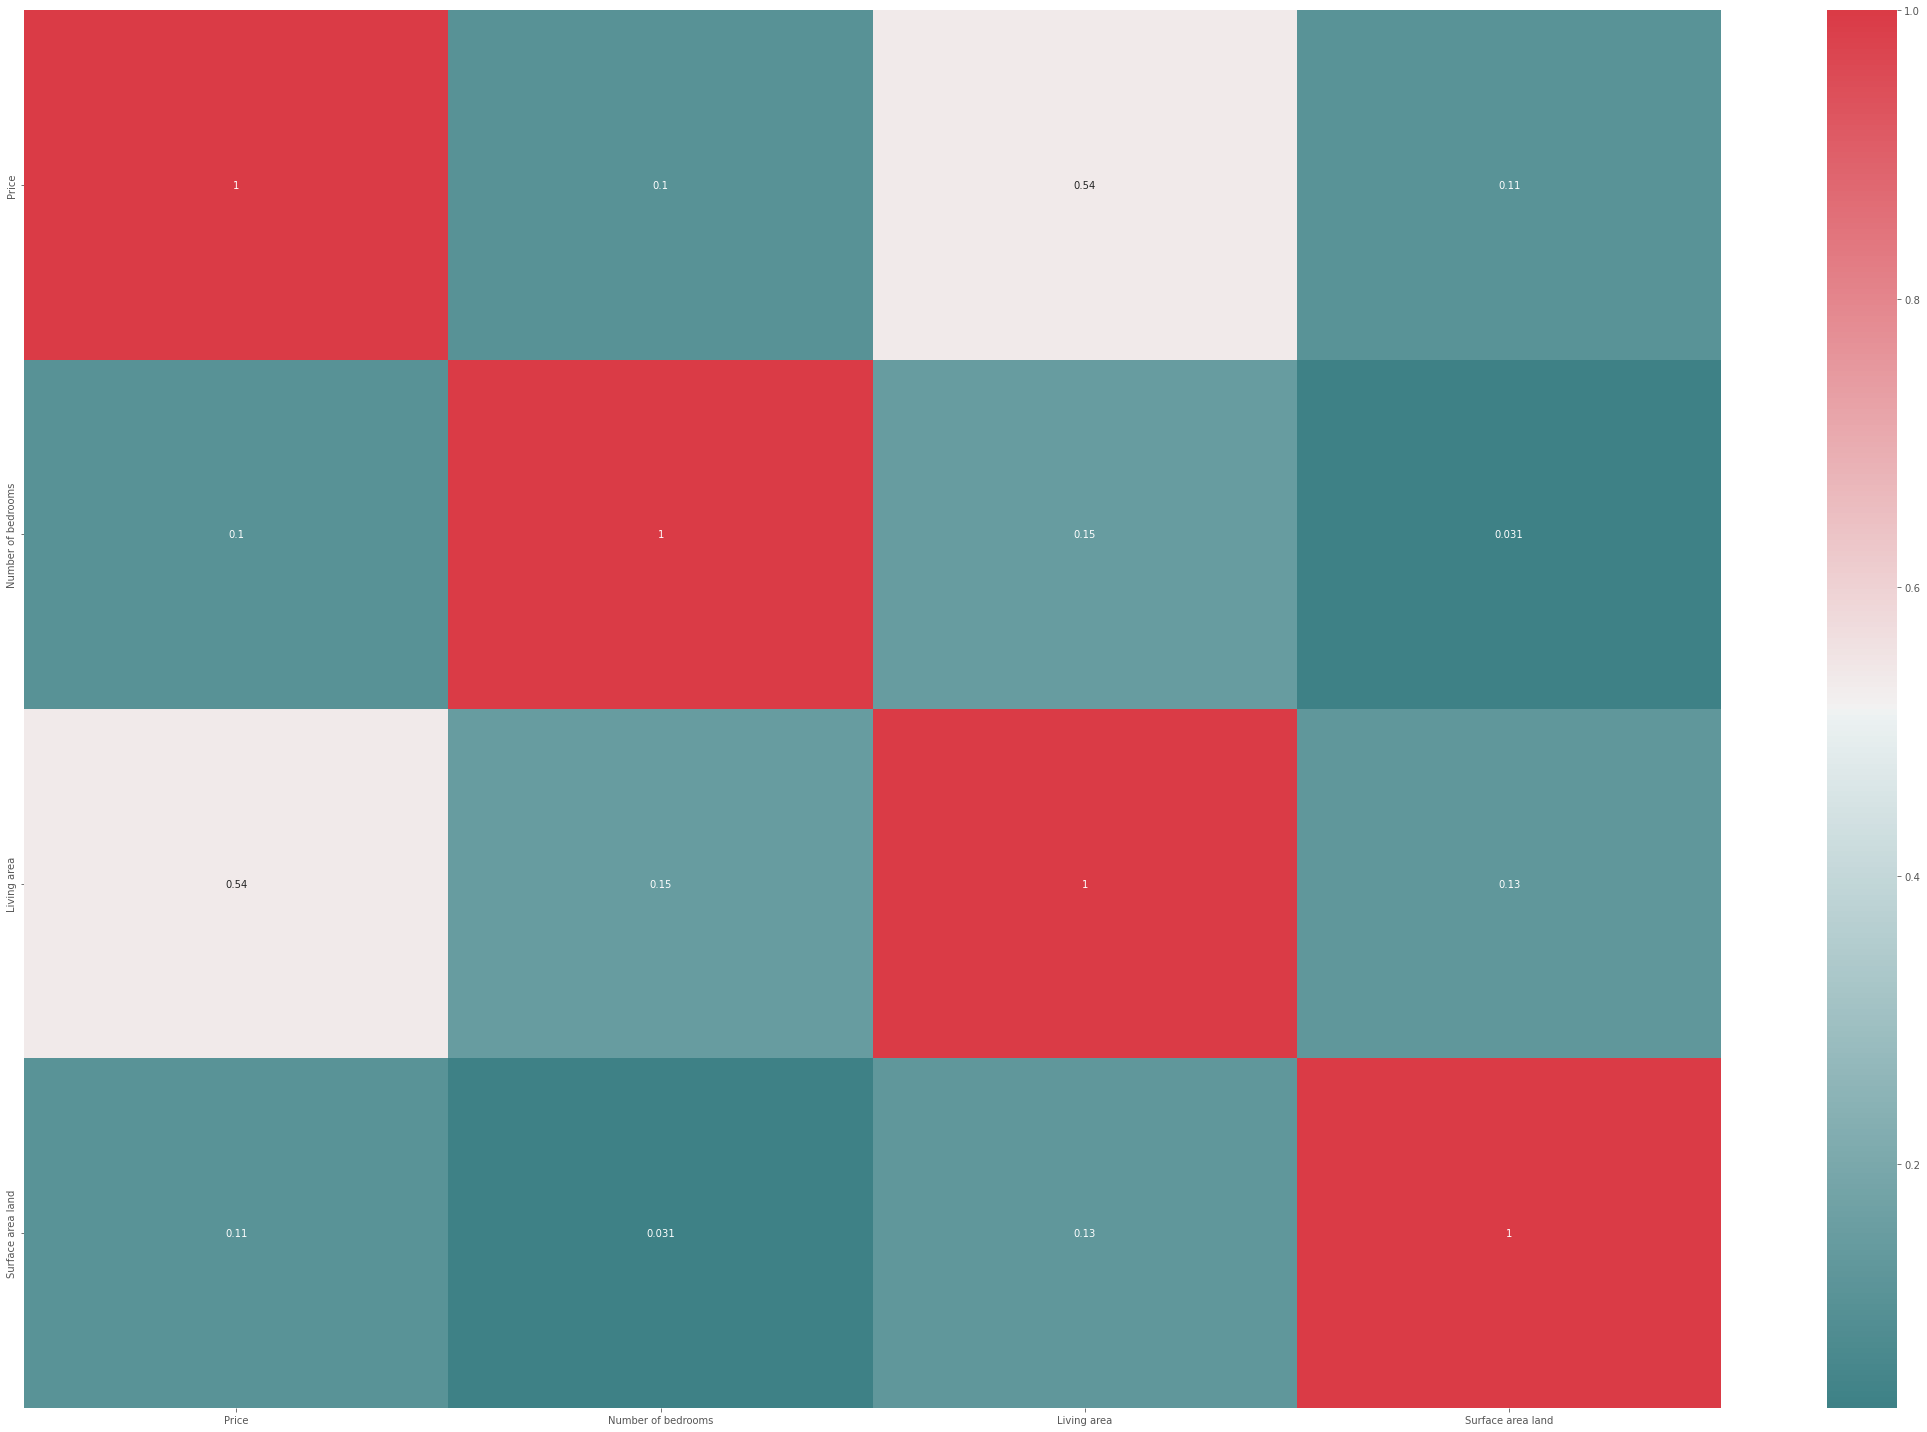

In [481]:
# Visualising the correlations among the numerical attributes using a heatmap
plt.figure(figsize=(30,20))
corr = new_df.corr()
sns.heatmap(corr,annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True))
plt.show()

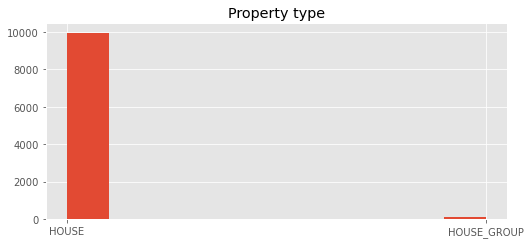

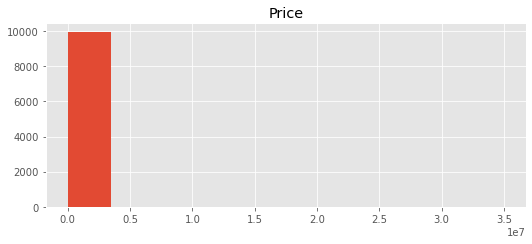

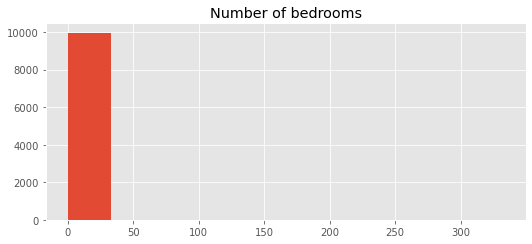

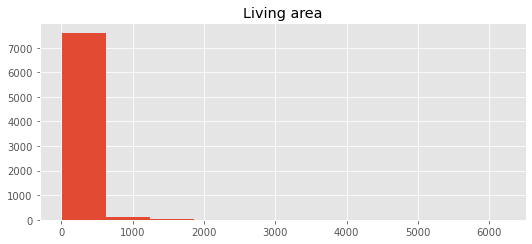

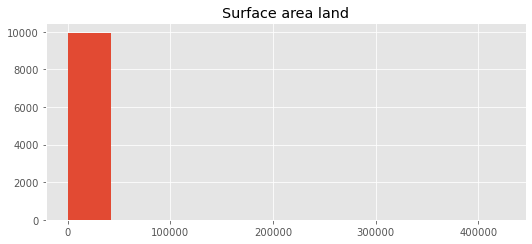

In [482]:
#Visualising the distribution of data under each numerical attribute
for i in new_df.columns:
    plt.hist(new_df[i])
    plt.title(i)
    plt.show()

**X = numerical variables 'Number of bedrooms', 'Living area' and 'Surface living area
in relation to y = 'Price'**

**A. 'Number of bedrooms'**

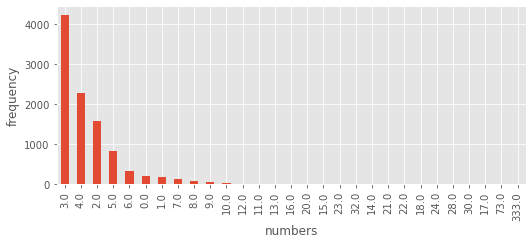

In [418]:
# We can create a frequency plot to see which values under 'Number of bedrooms' are available and give us
# a concrete idea of the count of each value
# The information coincides with the stat info generated earlier from executing pandas .describe() function
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

new_df['Number of bedrooms'].value_counts().plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency')

plt.show()

This gives us a good idea of the **distribution of the number of bedrooms** of all observations in the data 

We can now imagine **a set of ranges of the number of bedrooms**
Obviously **333.0 or 0 number of bedrooms** for example, **are undesired** and shall be dealt with later. 
We shall work with **a set of ranges of number of bedrooms for our inevitable predictive model.**

In [419]:
# Before we provide a glimpse of the correlation between the numerical variables of 'Number of bedrooms' and 
# 'Price', let's extract a sample and pass that onto a new data frame
bedrooms_df = new_df[['Price', 'Number of bedrooms']]
bedrooms_df.head()

,Price,Number of bedrooms
59,1550000.0,0.0
76,388000.0,0.0
7528,380000.0,0.0
9272,699000.0,0.0
4799,410000.0,0.0


In [320]:
# Sorting values by 'Price' in this downsized data frame whose only other column is 'Number of bedrooms'
bedrooms_df.sort_values(by=['Price'], inplace=True)
bedrooms_df.head()

/Users/anix/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Price,Number of bedrooms
6621,2500.0,0.0
6468,2500.0,0.0
7753,2500.0,5.0
8635,10000.0,2.0
233,14900.0,2.0


In [420]:
# Selecting specific rows and columns from the data frame
# A few more steps before we can visualise a sample of a data frame that has only 'Price' and 'Number of bedrooms' as 
# fields
sample_bedroomsdf = bedrooms_df.iloc[0:1000]
sample_bedroomsdf.shape

(1000, 2)

In [421]:
# Getting a glimpse of the downsized data frame
# The NaN values will be dealt with later
sample_bedroomsdf.sort_values('Price')
sample_bedroomsdf.head()

,Price,Number of bedrooms
59,1550000.0,0.0
76,388000.0,0.0
7528,380000.0,0.0
9272,699000.0,0.0
4799,410000.0,0.0


/Users/anix/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


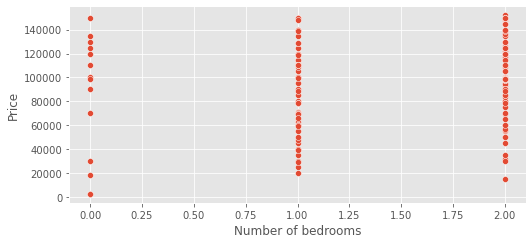

In [422]:
# Plotting scatterplot with 'Price' and 'Number of bedrooms' from the downsized data frame
sns.scatterplot(sample_bedroomsdf['Number of bedrooms'],sample_livingareadf['Price'])

plt.ylabel('Price')
plt.show()

**B. 'Living area'**

In [423]:
# Let's get an idea of the distribution of values under 'Living area'
# Pandas count distinct values in this column
new_df['Living area'].value_counts()

150.0    217
160.0    198
180.0    168
200.0    167
140.0    160
        ... 
419.0      1
399.0      1
421.0      1
473.0      1
734.0      1
Name: Living area, Length: 567, dtype: int64

In [424]:
# Before we provide a glimpse of the correlation between the numerical variables of 'Living area' and 
# 'Price', let's extract a sample and pass that onto a new data frame
livingarea_df = new_df[['Price', 'Living area']]
livingarea_df.head()

,Price,Living area
59,1550000.0,500.0
76,388000.0,NaN
7528,380000.0,185.0
9272,699000.0,334.0
4799,410000.0,NaN


In [425]:
# Sorting values by 'Price' in this downsized data frame whose only other column is 'Living area'
livingarea_df.sort_values(by=['Price'], inplace=True)
livingarea_df.head()

# The NaN values will be dealt with soon.

/Users/anix/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Price,Living area
7753,2500.0,1617.0
6621,2500.0,NaN
6468,2500.0,NaN
8635,10000.0,NaN
233,14900.0,32.0


In [426]:
# Selecting specific rows and columns from the data frame
# A few more steps before we can visualise a sample of a data frame that has only 'Price' and 'Living area' as 
# fields
sample_livingareadf = livingarea_df.iloc[0:1000]
sample_livingareadf.shape

(1000, 2)

In [427]:
# Getting a glimpse of the downsized data frame
# The NaN values will be dealt with later
sample_livingareadf.sort_values('Price')
sample_livingareadf.head()

,Price,Living area
7753,2500.0,1617.0
6621,2500.0,NaN
6468,2500.0,NaN
8635,10000.0,NaN
233,14900.0,32.0


/Users/anix/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


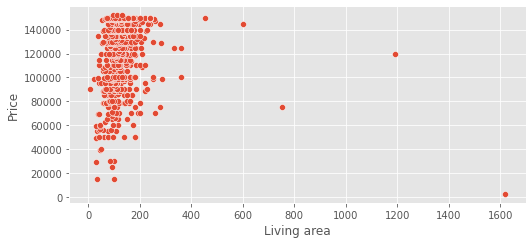

In [428]:
# Plotting scatterplot with 'Price' and 'Living area' from the downsized data frame
sns.scatterplot(sample_livingareadf['Living area'],sample_livingareadf['Price'])

plt.ylabel('Price')
plt.show()

**C. 'Surface area land'**

In [429]:
# Let's get an idea of the distribution of values under 'Surface area land'
# Pandas count distinct values in this column
new_df['Surface area land'].value_counts()

0.0        1319
100.0        88
300.0        61
200.0        60
250.0        58
           ... 
799.0         1
914.0         1
867.0         1
868.0         1
45000.0       1
Name: Surface area land, Length: 1974, dtype: int64

In [430]:
# Before we provide a glimpse of the correlation between the numerical variables of 'Surface area living' and 
# 'Price', let's extract a sample and pass that onto a new data frame
surfacearea_df = new_df[['Price', 'Surface area land']]
surfacearea_df.head()

,Price,Surface area land
59,1550000.0,0.0
76,388000.0,0.0
7528,380000.0,90.0
9272,699000.0,501.0
4799,410000.0,500.0


**There is a need to drop all fields that have values of '0.' This will reduce the sample size of our data set.**

In [431]:
# Sorting values by 'Price' in this downsized data frame whose only other column is 'Surface area land'
surfacearea_df.sort_values(by=['Price'], inplace=True)
surfacearea_df.head()

# The NaN values will be dealt with soon.

/Users/anix/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Price,Surface area land
7753,2500.0,3738.0
6621,2500.0,100.0
6468,2500.0,452.0
8635,10000.0,398.0
233,14900.0,200.0


In [432]:
# Selecting specific rows and columns from the data frame
# A few more steps before we can visualise a sample of a data frame that has only 'Price' and 'Surface area land' as 
# fields
sample_surfaceareadf = surfacearea_df.iloc[0:1000]
sample_surfaceareadf.shape

(1000, 2)

In [433]:
# Getting a glimpse of the downsized data frame
# The NaN values will be dealt with later
sample_surfaceareadf.sort_values('Price')
sample_surfaceareadf.head()

,Price,Surface area land
7753,2500.0,3738.0
6621,2500.0,100.0
6468,2500.0,452.0
8635,10000.0,398.0
233,14900.0,200.0


/Users/anix/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


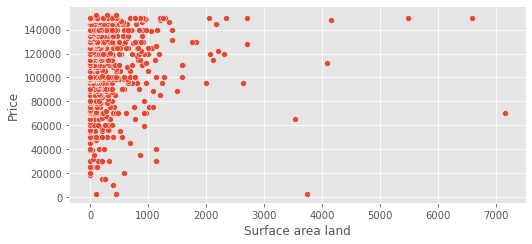

In [434]:
# Plotting scatterplot with 'Price' and 'Surface area land' from the downsized data frame
sns.scatterplot(sample_surfaceareadf['Surface area land'],sample_surfaceareadf['Price'])

plt.ylabel('Price')
plt.show()

### **2. Data cleaning**

**For this project, we have private individual sellers in mind who are likely to sell single properties. 
Thus, the features of the historical data we have will be configured around this condition.** 

**1. We imagine private individuals that re-sell a typical family home. Hence, we shall not consider 'outliers' such
as 'HOUSE_GROUPS' that imply more than one property, and have implications thus on other numerical variables
such as 'Number of bedrooms', 'Living area', 'Surface area land' (ie the features), and most especially, 'Price' (the label).** 

**2. With this precise client demographic in mind, the numerical variables 'Number of bedrooms', 'Living area', 'Surface area land' (ie the features), and most especially, 'Price' (the label), would be binned into smaller groups of more similar data.** 

### A. Dropping NaN values 

In [435]:
# Drop all rows with NaN values
new_df=new_df.dropna()
new_df=new_df.dropna(axis=0)

# Reset index after drop
new_df=new_df.dropna().reset_index(drop=True)

In [436]:
# Determining, in particular, the number of observations left
new_df.shape

(7739, 5)

In [437]:
# Geting a look at the shape of the downsized data frame 
new_df.head()

,Property type,Price,Number of bedrooms,Living area,Surface area land
0,HOUSE,1550000.0,0.0,500.0,0.0
1,HOUSE,380000.0,0.0,185.0,90.0
2,HOUSE,699000.0,0.0,334.0,501.0
3,HOUSE,595000.0,0.0,235.0,500.0
4,HOUSE,1150000.0,0.0,350.0,0.0


Out of the original 10,082 observations, we have a good **7,739 observations left**

### B. Standardising mismatched values under 'Property type' to ‘HOUSE'

In [438]:
# Replacing the 'HOUSE_GROUP' values under 'Property type' with 'HOUSE'
# Applying the condition
new_df.loc[new_df['Property type'] == 'HOUSE_GROUP', 'HOUSE'] = 1

In [439]:
# Getting a good glimpse of the data frame to see whether the values under 'Property type' have changed from
# 'HOUSE_GROUP' to 'HOUSE'
new_df

,Property type,Price,Number of bedrooms,Living area,Surface area land,HOUSE
0,HOUSE,1550000.0,0.0,500.0,0.0,NaN
1,HOUSE,380000.0,0.0,185.0,90.0,NaN
2,HOUSE,699000.0,0.0,334.0,501.0,NaN
3,HOUSE,595000.0,0.0,235.0,500.0,NaN
4,HOUSE,1150000.0,0.0,350.0,0.0,NaN
...,...,...,...,...,...,...
7734,HOUSE,1790000.0,23.0,734.0,350.0,NaN
7735,HOUSE,1350000.0,23.0,750.0,500.0,NaN
7736,HOUSE,1200000.0,24.0,1000.0,205.0,NaN
7737,HOUSE,2950000.0,30.0,1200.0,45000.0,NaN


### C. Dropping undesired in 'Number of bedrooms’

In [440]:
# Pandas count distinct values in column 'Number of bedrooms'
new_df['Number of bedrooms'].value_counts()

3.0      3252
4.0      1806
2.0      1175
5.0       718
6.0       282
7.0       117
1.0       114
0.0       104
8.0        65
9.0        41
10.0       22
11.0       10
13.0        6
12.0        6
16.0        4
20.0        4
15.0        3
23.0        3
14.0        1
17.0        1
18.0        1
21.0        1
24.0        1
30.0        1
333.0       1
Name: Number of bedrooms, dtype: int64

In [441]:
# We shall drop outliers i.e. the values under 'Number of bedrooms' that are 0 or greater than 5
new_df = new_df[~new_df['Number of bedrooms'].isin([0, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 30, 333])] 

In [442]:
# Getting a glimpse of the data frame after the undesired values under 'Number of bedrooms' were dropped
new_df.shape

(7065, 6)

In [443]:
# Checking if the desired range of 1-5 number of bedrooms remain in the data frame
new_df['Number of bedrooms'].value_counts()

3.0    3252
4.0    1806
2.0    1175
5.0     718
1.0     114
Name: Number of bedrooms, dtype: int64

**We are down to 7065 observations now

### D. Dropping undesired values in 'Living area'

In [444]:
# Pandas count distinct values in column 'Living area'
new_df['Living area'].value_counts()

150.0     214
160.0     196
180.0     160
140.0     158
200.0     157
         ... 
558.0       1
467.0       1
1494.0      1
432.0       1
321.0       1
Name: Living area, Length: 478, dtype: int64

In [445]:
# To remind us of the min and max values under 'Living area'
print(new_df['Living area'].min())
print()
print(new_df['Living area'].max())

7.0

2700.0


In [446]:
# For this project, we shall isolate the observations with 'Living area' measurements that are between 70 and 300 sqm
# This is gauging a measurement of living space area for homes in the Belgian market in general
new_df = new_df[(new_df['Living area']> 69) & (new_df['Living area']< 301)] 

In [447]:
# Getting a glimpse of the data frame after the undesired values under 'Living area' were dropped
new_df.shape

(6336, 6)

In [448]:
# Checking if the desired range reflects in the data frame
new_df['Living area'].value_counts()

150.0    214
160.0    196
180.0    160
140.0    158
200.0    157
        ... 
288.0      3
296.0      2
292.0      2
72.0       2
299.0      2
Name: Living area, Length: 231, dtype: int64

**We are down to 6,336 observations now

### E. Dropping undesired values in 'Surfce area land'

In [449]:
# Pandas count distinct values in column 'Surface area land'
new_df['Surface area land'].value_counts()

0.0       597
100.0      63
250.0      44
150.0      42
300.0      41
         ... 
1069.0      1
634.0       1
1073.0      1
1093.0      1
936.0       1
Name: Surface area land, Length: 1492, dtype: int64

In [450]:
# To remind us of the min and max values under 'Surface area land'
print(new_df['Surface area land'].min())
print()
print(new_df['Surface area land'].max())

0.0

110000.0


In [454]:
# For this project, we shall isolate the observations with 'Surface area land' measurements that are between 
# 50 and 1000 sqm.
# This is gauging a measurement of Land property area for homes in the Belgian market in general
new_df = new_df[(new_df['Surface area land']> 49) & (new_df['Surface area land']< 1001)] 

In [455]:
# Getting a glimpse of the data frame after the undesired values under 'Surface area land' were dropped
new_df.shape

(4771, 6)

In [456]:
# Checking if the desired range reflects in the data frame
new_df['Surface area land'].value_counts()

100.0    63
250.0    44
150.0    42
300.0    41
180.0    39
         ..
739.0     1
988.0     1
985.0     1
741.0     1
936.0     1
Name: Surface area land, Length: 868, dtype: int64

**We are down to 4,771 observations now

### F. Dropping undesired values in ‘Price’

In [457]:
# Pandas count distinct values in column 'Price'
new_df['Price'].value_counts()

299000.0    86
249000.0    85
325000.0    83
349000.0    81
295000.0    79
            ..
550153.0     1
230500.0     1
568765.0     1
598328.0     1
835000.0     1
Name: Price, Length: 753, dtype: int64

In [458]:
# To remind us of the min and max values under 'Price'
print(new_df['Price'].min())
print()
print(new_df['Price'].max())

15000.0

4290000.0


In [459]:
# For this project, we shall isolate the observations with 'Price' measurements that are between 
# 100,000 and 900,000 euros
# This is gauging sale price of homes in the Belgian market in general
new_df = new_df[(new_df['Price']> 99999) & (new_df['Price']< 899000)] 

In [460]:
# Getting a glimpse of the data frame after the undesired values under 'Price' were dropped
new_df.shape

(4637, 6)

In [461]:
# Checking if the desired range reflects in the data frame
new_df['Price'].value_counts()

299000.0    86
249000.0    85
325000.0    83
349000.0    81
295000.0    79
            ..
434000.0     1
414000.0     1
454000.0     1
458000.0     1
835000.0     1
Name: Price, Length: 700, dtype: int64

**FINALLY, WE ARE DOWN TO 4,637 OBSERVATIONS**

### **3. Finale: The baseline data frame saved as a new csv file**

In [462]:
# Getting a glimpse of the baseline data frame that will be the basis for building and evaluating
# a linear regression machine learning model in II. MODELLING PIPELINE.
new_df.head()

,Property type,Price,Number of bedrooms,Living area,Surface area land,HOUSE
105,HOUSE,295000.0,1.0,70.0,417.0,NaN
106,HOUSE,235000.0,1.0,70.0,104.0,NaN
107,HOUSE,275000.0,1.0,90.0,415.0,NaN
108,HOUSE,295000.0,1.0,70.0,417.0,NaN
111,HOUSE,239000.0,1.0,100.0,355.0,NaN


In [463]:
# Drop the last (unnecessary) column of the dataframe
new_df = new_df.iloc[: , :-1]
new_df.head()

,Property type,Price,Number of bedrooms,Living area,Surface area land
105,HOUSE,295000.0,1.0,70.0,417.0
106,HOUSE,235000.0,1.0,70.0,104.0
107,HOUSE,275000.0,1.0,90.0,415.0
108,HOUSE,295000.0,1.0,70.0,417.0
111,HOUSE,239000.0,1.0,100.0,355.0


In [464]:
new_df.to_csv('baseline.csv', encoding='utf-8')